In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
full_data = pd.read_csv("https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv")

In [3]:
full_data.shape

(485796, 61)

This data is quite huge. Containing 485796 rows and 61 columns

In [4]:
full_data.columns

Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'icu_patients',
       'icu_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'stringency_index',
       'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
    

In [5]:
full_data.head(10)

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
5,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
6,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
7,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
8,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
9,Afghanistan,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462


In [6]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485796 entries, 0 to 485795
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     485796 non-null  object 
 1   date                                        485796 non-null  object 
 2   total_cases                                 471250 non-null  float64
 3   new_cases                                   468715 non-null  float64
 4   new_cases_smoothed                          467494 non-null  float64
 5   total_cases_per_million                     471250 non-null  float64
 6   new_cases_per_million                       468715 non-null  float64
 7   new_cases_smoothed_per_million              467494 non-null  float64
 8   total_deaths                                471250 non-null  float64
 9   new_deaths                                  469406 non-null  float64
 

In [7]:
full_data['date'] = pd.to_datetime(full_data['date'])

full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485796 entries, 0 to 485795
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   country                                     485796 non-null  object        
 1   date                                        485796 non-null  datetime64[ns]
 2   total_cases                                 471250 non-null  float64       
 3   new_cases                                   468715 non-null  float64       
 4   new_cases_smoothed                          467494 non-null  float64       
 5   total_cases_per_million                     471250 non-null  float64       
 6   new_cases_per_million                       468715 non-null  float64       
 7   new_cases_smoothed_per_million              467494 non-null  float64       
 8   total_deaths                                471250 non-null  float64      

In [10]:
# How many countries are there

full_data['country'].nunique()

262

In [11]:
full_data['date'].max() , full_data['date'].min()

(Timestamp('2025-12-31 00:00:00'), Timestamp('2020-01-01 00:00:00'))

In [12]:
pd.to_datetime('2023-12-31')

Timestamp('2023-12-31 00:00:00')

In [13]:
# filter the data for 2020, 2021, 2022, and 2023

filter_data = full_data[full_data['date'] < pd.to_datetime('2024-01-01')]

In [14]:
filter_data.shape

(375479, 61)

In [15]:
filter_data['date'].max()

Timestamp('2023-12-31 00:00:00')

In [16]:
filter_data.columns

Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'icu_patients',
       'icu_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'stringency_index',
       'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
    

In [18]:
columns_to_select = ['country', 'date', 'total_cases', 'new_cases', 'total_cases_per_million',
                     'total_deaths', 'new_deaths', 'total_deaths_per_million','new_deaths_per_million',
                     'total_tests', 'new_tests','total_tests_per_thousand', 'new_tests_per_thousand',
                     'total_vaccinations','people_vaccinated','total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                     'continent','population','human_development_index']

len(columns_to_select)

20

In [19]:
filter_data = filter_data[columns_to_select]

filter_data.shape

(375479, 20)

In [21]:
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375479 entries, 0 to 485368
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   country                         375479 non-null  object        
 1   date                            375479 non-null  datetime64[ns]
 2   total_cases                     364500 non-null  float64       
 3   new_cases                       363675 non-null  float64       
 4   total_cases_per_million         364500 non-null  float64       
 5   total_deaths                    364500 non-null  float64       
 6   new_deaths                      363940 non-null  float64       
 7   total_deaths_per_million        364500 non-null  float64       
 8   new_deaths_per_million          363940 non-null  float64       
 9   total_tests                     79387 non-null   float64       
 10  new_tests                       75403 non-null   float64     

In [22]:
filter_data.isnull().sum()

,0
country,0
date,0
total_cases,10979
new_cases,11804
total_cases_per_million,10979
total_deaths,10979
new_deaths,11539
total_deaths_per_million,10979
new_deaths_per_million,11539
total_tests,296092


In [23]:
filter_data[filter_data['human_development_index'].isnull()][['country', 'human_development_index']]

,country,human_development_index
7569,American Samoa,NaN
7570,American Samoa,NaN
7571,American Samoa,NaN
7572,American Samoa,NaN
7573,American Samoa,NaN
...,...,...
479700,"World excl. China, South Korea, Japan and Sing...",NaN
479701,"World excl. China, South Korea, Japan and Sing...",NaN
479702,"World excl. China, South Korea, Japan and Sing...",NaN
479703,"World excl. China, South Korea, Japan and Sing...",NaN


In [24]:
filter_data[filter_data['human_development_index'].isnull()]['country'].unique()

array(['American Samoa', 'Anguilla', 'Aruba', 'Asia excl. China',
       'Bermuda', 'Bonaire Sint Eustatius and Saba',
       'British Virgin Islands', 'Cayman Islands', 'Cook Islands',
       'Curacao', 'England', 'England & Wales', 'Falkland Islands',
       'Faroe Islands', 'French Guiana', 'French Polynesia', 'Gibraltar',
       'Greenland', 'Guadeloupe', 'Guam', 'Guernsey', 'Isle of Man',
       'Jersey', 'Kosovo', 'Macao', 'Martinique', 'Mayotte', 'Monaco',
       'Montserrat', 'New Caledonia', 'Niue', 'North Korea',
       'Northern Ireland', 'Northern Mariana Islands', 'Pitcairn',
       'Puerto Rico', 'Reunion', 'Saint Barthelemy', 'Saint Helena',
       'Saint Martin (French part)', 'Saint Pierre and Miquelon',
       'Scotland', 'Sint Maarten (Dutch part)', 'Summer Olympics 2020',
       'Taiwan', 'Tokelau', 'Transnistria', 'Turks and Caicos Islands',
       'United States Virgin Islands', 'Vatican', 'Wales',
       'Wallis and Futuna', 'Western Sahara', 'Winter Olympics 202

In [25]:
filter_data[filter_data['population'].isnull()]['country'].unique()

array(['Asia excl. China', 'England', 'England & Wales',
       'Northern Ireland', 'Pitcairn', 'Scotland', 'Summer Olympics 2020',
       'Transnistria', 'Wales', 'Winter Olympics 2022',
       'World excl. China', 'World excl. China and South Korea',
       'World excl. China, South Korea, Japan and Singapore'],
      dtype=object)

In [26]:
filter_data[filter_data['continent'].isnull()]['country'].unique()

array(['Africa', 'Asia', 'Asia excl. China', 'England', 'England & Wales',
       'Europe', 'European Union (27)', 'High-income countries',
       'Low-income countries', 'Lower-middle-income countries',
       'North America', 'Northern Ireland', 'Oceania', 'Scotland',
       'South America', 'Summer Olympics 2020', 'Transnistria',
       'Upper-middle-income countries', 'Wales', 'Winter Olympics 2022',
       'World', 'World excl. China', 'World excl. China and South Korea',
       'World excl. China, South Korea, Japan and Singapore'],
      dtype=object)

In [28]:
filter_data[filter_data['country']=='World'].head(10)

,country,date,total_cases,new_cases,total_cases_per_million,total_deaths,new_deaths,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,total_vaccinations,people_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,continent,population,human_development_index
472592,World,2020-01-04,3.0,3.0,0.000376,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.021407e+09,0.739
472593,World,2020-01-05,2.0,0.0,0.000250,3.0,3.0,0.000376,0.000376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.021407e+09,0.739
472594,World,2020-01-06,5.0,3.0,0.000626,3.0,0.0,0.000376,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.021407e+09,0.739
472595,World,2020-01-07,5.0,0.0,0.000626,3.0,0.0,0.000376,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.021407e+09,0.739
472596,World,2020-01-08,6.0,1.0,0.000751,3.0,0.0,0.000376,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.021407e+09,0.739
472597,World,2020-01-09,6.0,0.0,0.000751,3.0,0.0,0.000376,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.021407e+09,0.739
472598,World,2020-01-10,6.0,0.0,0.000751,3.0,0.0,0.000376,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.021407e+09,0.739
472599,World,2020-01-11,6.0,0.0,0.000751,3.0,0.0,0.000376,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.021407e+09,0.739
472600,World,2020-01-12,47.0,41.0,0.005883,4.0,1.0,0.000501,0.000125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.021407e+09,0.739
472601,World,2020-01-13,48.0,1.0,0.006008,4.0,0.0,0.000501,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.021407e+09,0.739


In [29]:
world_data = filter_data[filter_data['country']=='World']

world_data

,country,date,total_cases,new_cases,total_cases_per_million,total_deaths,new_deaths,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,total_vaccinations,people_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,continent,population,human_development_index
472592,World,2020-01-04,3.0,3.0,0.000376,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.021407e+09,0.739
472593,World,2020-01-05,2.0,0.0,0.000250,3.0,3.0,0.000376,0.000376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.021407e+09,0.739
472594,World,2020-01-06,5.0,3.0,0.000626,3.0,0.0,0.000376,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.021407e+09,0.739
472595,World,2020-01-07,5.0,0.0,0.000626,3.0,0.0,0.000376,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.021407e+09,0.739
472596,World,2020-01-08,6.0,1.0,0.000751,3.0,0.0,0.000376,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.021407e+09,0.739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474045,World,2023-12-27,773771049.0,879.0,96856.270000,7014008.0,5.0,877.973750,0.000626,NaN,NaN,NaN,NaN,1.372082e+10,5.645117e+09,171.83050,70.695730,NaN,8.021407e+09,0.739
474046,World,2023-12-28,773772441.0,1392.0,96856.445000,7014015.0,7.0,877.974600,0.000876,NaN,NaN,NaN,NaN,1.372129e+10,5.645138e+09,171.83640,70.695990,NaN,8.021407e+09,0.739
474047,World,2023-12-29,773773689.0,1248.0,96856.600000,7014024.0,9.0,877.975770,0.001127,NaN,NaN,NaN,NaN,1.372171e+10,5.645158e+09,171.84163,70.696250,NaN,8.021407e+09,0.739
474048,World,2023-12-30,773775397.0,1708.0,96856.820000,7014036.0,12.0,877.977230,0.001502,NaN,NaN,NaN,NaN,1.372201e+10,5.645178e+09,171.84538,70.696495,NaN,8.021407e+09,0.739


<ipython-input-33-4112030bfaad>:3: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(x=world_data['date'], y=world_data['total_cases'], fmt='b-')


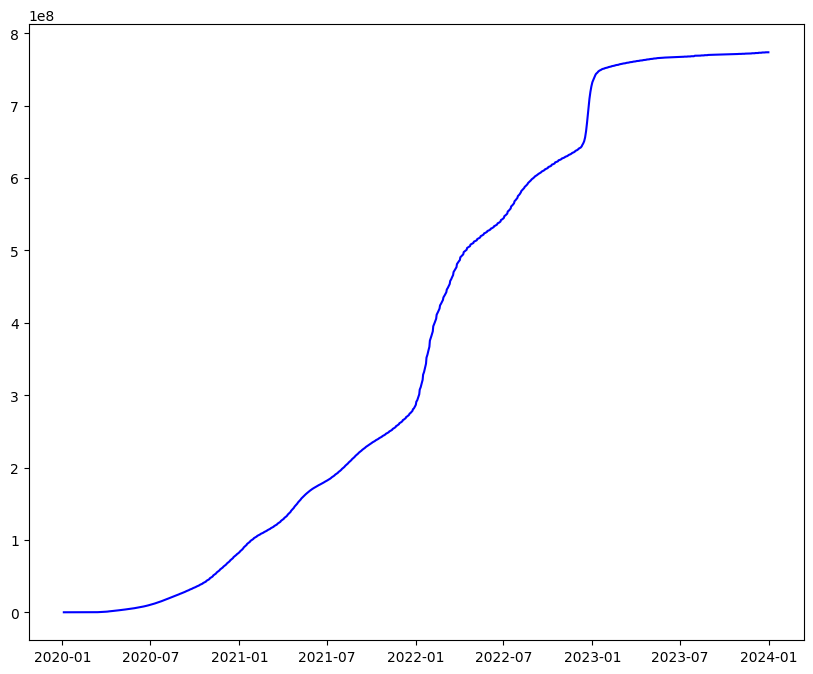

In [33]:
plt.figure(figsize=(10,8))

plt.plot_date(x=world_data['date'], y=world_data['total_cases'], fmt='b-')

plt.show()

In [34]:
filter_data = filter_data.fillna(0)

In [41]:
filter_data.groupby("country").agg('max')['total_cases'].reset_index().sort_values(by='total_cases', ascending=False).head(50)

,country,total_cases
255,World,773797326.0
256,World excl. China,674474599.0
257,World excl. China and South Korea,639902726.0
258,"World excl. China, South Korea, Japan and Sing...",603174639.0
99,High-income countries,427918654.0
12,Asia,301161409.0
73,Europe,251792867.0
244,Upper-middle-income countries,250880146.0
13,Asia excl. China,201838682.0
74,European Union (27),185380637.0


### Power BI data analysis

For our analysis in Power BI, let's download
- continent wise data (i.e. Asia, Europe, Africa, North America, South America, Oceania)
- Total world data (World)
- Data for few countries [top 10 countries based on total cases]
    - United States
    - China
    - India
    - France
    - Germany
    - Brazil
    - South Korea
    - Japan
    - Italy
    - United Kingdom

In [42]:
countries = ['World', 'Asia', 'Africa', 'Europe', 'North America', 'South America', 'Oceania',
             'United States', 'China', 'India', 'France', 'Germany', 'Brazil', 'South Korea', 'Japan',
             'Italy', 'United Kingdom']

In [43]:
final_data = filter_data[filter_data['country'].isin(countries)]

In [44]:
final_data['country'].unique()

array(['Africa', 'Asia', 'Brazil', 'China', 'Europe', 'France', 'Germany',
       'India', 'Italy', 'Japan', 'North America', 'Oceania',
       'South America', 'South Korea', 'United Kingdom', 'United States',
       'World'], dtype=object)

In [45]:
final_data.shape

(24816, 20)

In [50]:
final_data.groupby('country').agg({'total_cases': 'max', 'date': ['min', 'max', 'count']})

total_cases       date                 
                        max        min        max count
country                                                
Africa           13133432.0 2020-01-04 2023-12-31  1458
Asia            301161409.0 2020-01-04 2023-12-31  1458
Brazil           37511921.0 2020-01-01 2023-12-31  1461
China            99322727.0 2020-01-01 2023-12-31  1461
Europe          251792867.0 2020-01-04 2023-12-31  1458
France           38997490.0 2020-01-01 2023-12-31  1461
Germany          38437756.0 2020-01-01 2023-12-31  1461
India            45013172.0 2020-01-01 2023-12-31  1461
Italy            26662389.0 2020-01-01 2023-12-31  1461
Japan            33803572.0 2020-01-01 2023-12-31  1461
North America   124427381.0 2020-01-04 2023-12-31  1458
Oceania          14658184.0 2020-01-04 2023-12-31  1458
South America    68624053.0 2020-01-04 2023-12-31  1458
South Korea      34571873.0 2020-01-01 2023-12-31  1461
United Kingdom   24865284.0 2020-01-01 2023-12-31  1461
United States   103436829.0 2020-01-01 2023-12-31  1461
World           773797326.0 2020-01-04 2023-12-31  1458

In [52]:
final_data.to_csv("/content/covid19_final_dataset.csv")